In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [2]:
missing_values = [" ?"]
headers =  ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", 
            "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
data = pd.read_csv('./data/adult.data', header=None, na_values=missing_values, names=headers)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# For each continuous attribute, calculate its average, standard deviation, minimum, and maximum values
for col in data.select_dtypes(exclude=['object']).columns.tolist():
    print('%s:' % (col))
    print('\t Mean = %.2f' % data[col].mean())
    print('\t Standard deviation = %.2f' % data[col].std())
    print('\t Minimum = %.2f' % data[col].min())
    print('\t Maximum = %.2f' % data[col].max())

age:
	 Mean = 38.58
	 Standard deviation = 13.64
	 Minimum = 17.00
	 Maximum = 90.00
fnlwgt:
	 Mean = 189778.37
	 Standard deviation = 105549.98
	 Minimum = 12285.00
	 Maximum = 1484705.00
education-num:
	 Mean = 10.08
	 Standard deviation = 2.57
	 Minimum = 1.00
	 Maximum = 16.00
capital-gain:
	 Mean = 1077.65
	 Standard deviation = 7385.29
	 Minimum = 0.00
	 Maximum = 99999.00
capital-loss:
	 Mean = 87.30
	 Standard deviation = 402.96
	 Minimum = 0.00
	 Maximum = 4356.00
hours-per-week:
	 Mean = 40.44
	 Standard deviation = 12.35
	 Minimum = 1.00
	 Maximum = 99.00


In [4]:
# For the discrete attribute, count the frequency for each of its distinct values
for col in data.select_dtypes(include=['object']).columns.tolist():
    print('%s:' % (col))
    print('%s \n' % data[col].value_counts())

workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital-status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation:
 Prof-specialty       4140
 Craft-repair 

<AxesSubplot: >

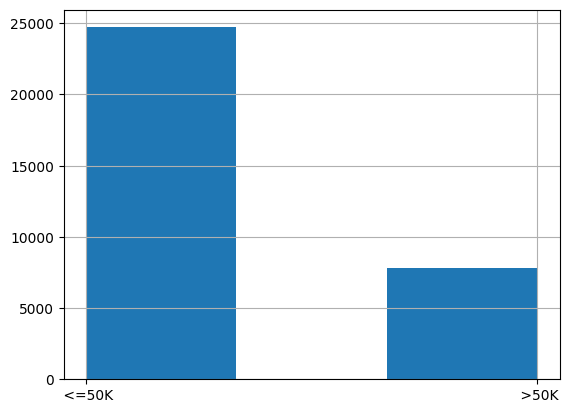

In [5]:
# Draw histogram of the class variable
%matplotlib inline
data['class'].hist(bins=3)

In [6]:
# Class "<=50K" has significantly more records than class ">50K"
# There are nearly triple amounts of people with income <=50K than people with income >50K

<AxesSubplot: >

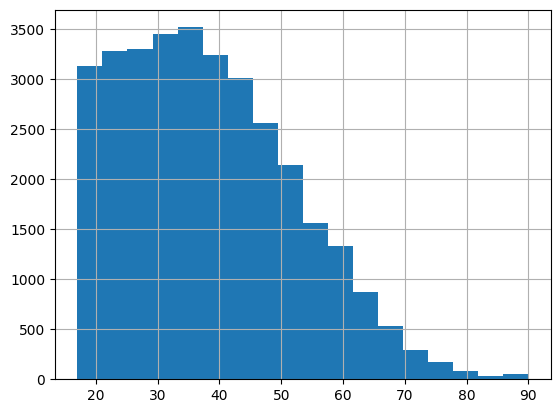

In [7]:
# Draw the distribution of values for a continuous attribute using a histogram
data['age'].hist(bins=18)

In [8]:
# People recorded in the datasets are primarily in their 20s to 50s

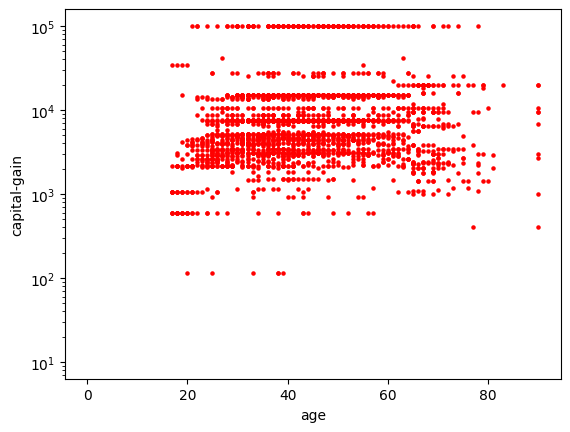

In [9]:
plt.scatter(data['age'], data['capital-gain'], s=5, color='red')
plt.xlabel('age')
plt.ylabel('capital-gain')
plt.semilogy(10)

In [10]:
# There is no relationship between age and capital gain of a person
# Most people recoreded in the datasets have capital gain around 1000 to 10000

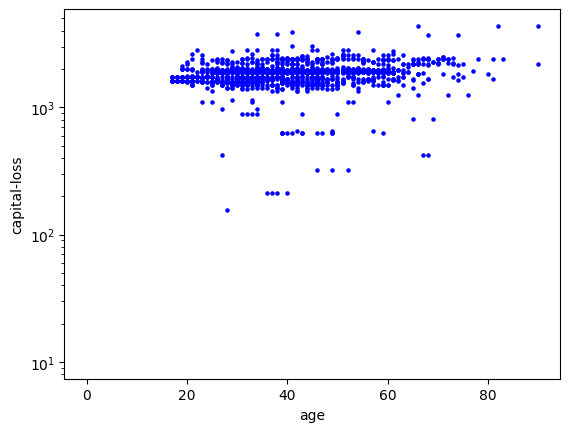

In [11]:
plt.scatter(data['age'], data['capital-loss'], s=5, color='blue')
plt.xlabel('age')
plt.ylabel('capital-loss')
plt.semilogy(10)

In [12]:
# There is no relationship between age and capital loss of a person
# Most people recoreded in the datasets have capital loss around 1000 to 4000

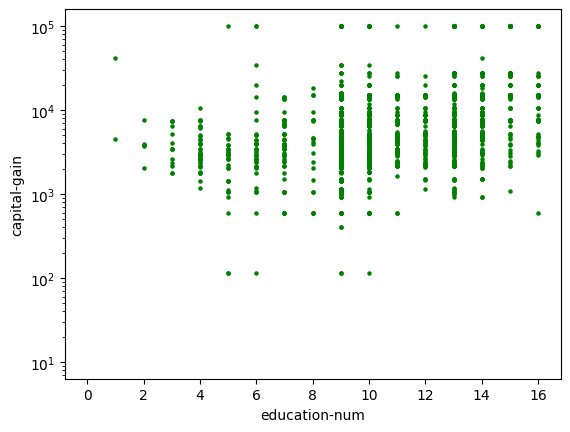

In [13]:
plt.scatter(data['education-num'], data['capital-gain'], s=5, color='green')
plt.xlabel('education-num')
plt.ylabel('capital-gain')
plt.semilogy(10)

In [14]:
# There is no relationship between the number of years of education and capital gain of a person
# The number of years of education doesn't affect the capital gain of a person

Text(0, 0.5, 'hours-per-week')

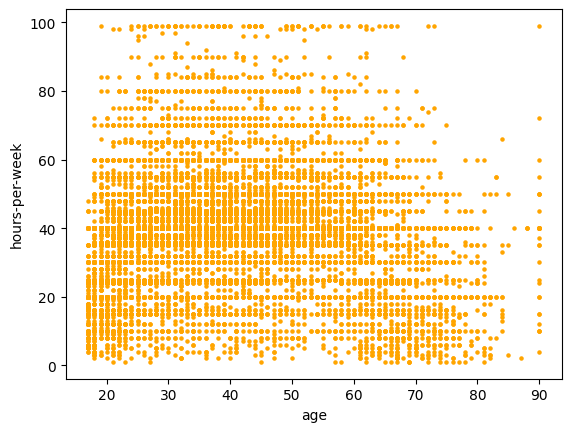

In [15]:
plt.scatter(data['age'], data['hours-per-week'], s=5, color='orange')
plt.xlabel('age')
plt.ylabel('hours-per-week')

In [16]:
# Most people recorded in the datasets work around 40 to 50 hours per week
# Most people in their 20s work less, around 20 hours per week
# As age increases, people work fewer hours per week

<AxesSubplot: >

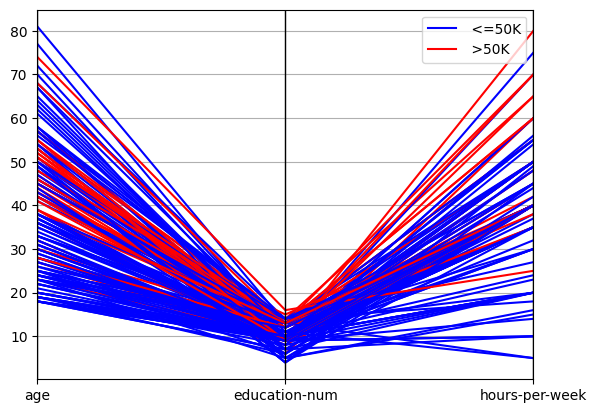

In [17]:
# Draw a parallel diagram for some attributes in the data set
plot_data = data[['age', 'education-num', 'hours-per-week', 'class']]
plot_sample = plot_data.sample(frac=.005)
parallel_coordinates(plot_sample, 'class', color=['blue', 'red'])

In [18]:
# People with income >50K have a higher number of years of education and work more hours per week
# Age doesn't affect the income of a person, a person can have an income >50K with very low years of age

In [19]:
# Identify which attributes have missing values
nan_cols = []
for col in data.columns:
    if data[col].isnull().values.any():
        nan_cols.append(col)
print(nan_cols)

['workclass', 'occupation', 'native-country']


In [20]:
# Draw a histogram of the attribute before replacing missing values

<AxesSubplot: >

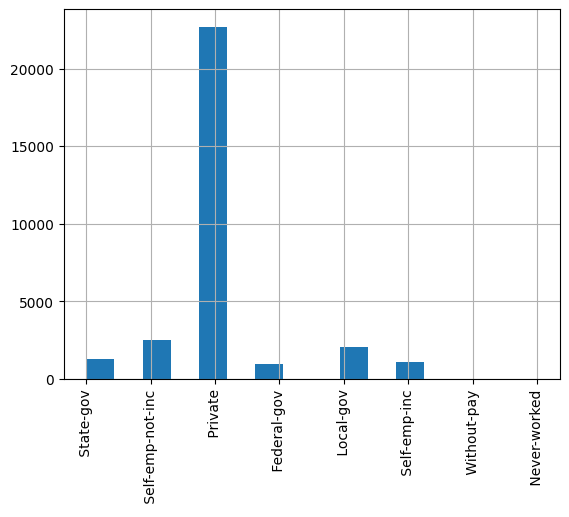

In [21]:
data['workclass'].hist(bins=data['workclass'].nunique()*2, xrot=90)

<AxesSubplot: >

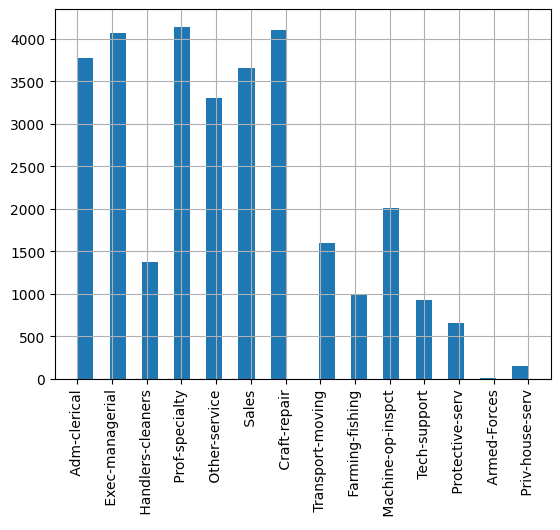

In [22]:
data['occupation'].hist(bins=data['occupation'].nunique()*2, xrot=90)

<AxesSubplot: >

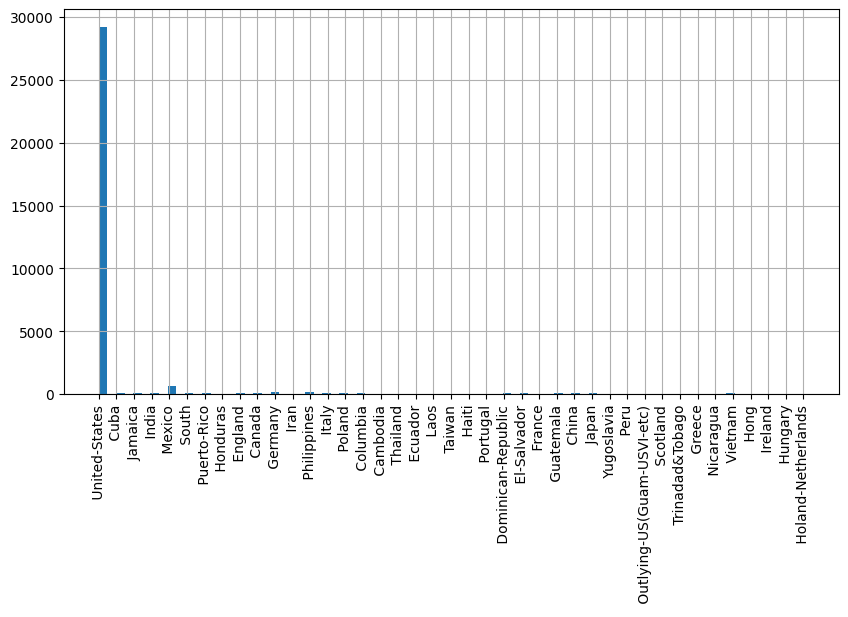

In [23]:
data['native-country'].hist(bins=data['native-country'].nunique()*2, figsize=(10, 5), xrot=90)

In [24]:
# Replacing missing values by the average or mode of the attribute (based on attribute types)
fillna_data = data
for col in nan_cols:
    fillna_data[col].fillna(fillna_data[col].mode()[0], inplace=True)

In [25]:
# Draw a histogram of the attribute after replacing missing values by the above method

<AxesSubplot: >

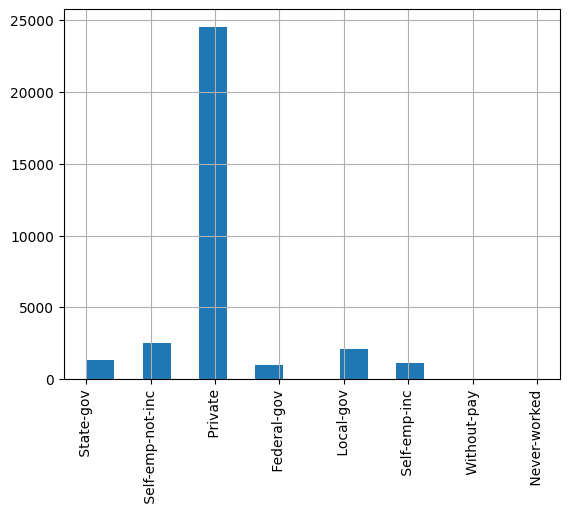

In [26]:
fillna_data['workclass'].hist(bins=fillna_data['workclass'].nunique()*2, xrot=90)

<AxesSubplot: >

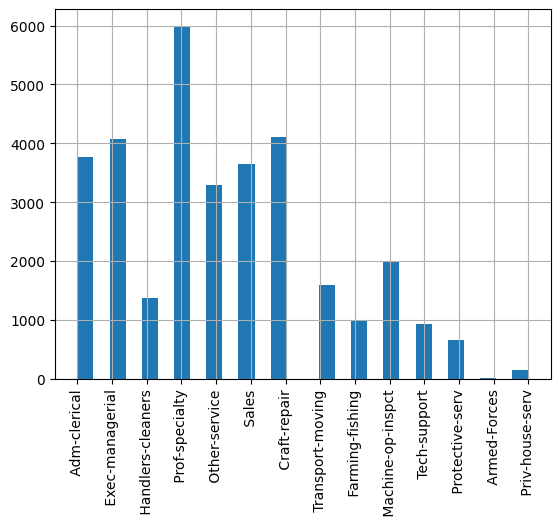

In [27]:
fillna_data['occupation'].hist(bins=fillna_data['occupation'].nunique()*2, xrot=90)

<AxesSubplot: >

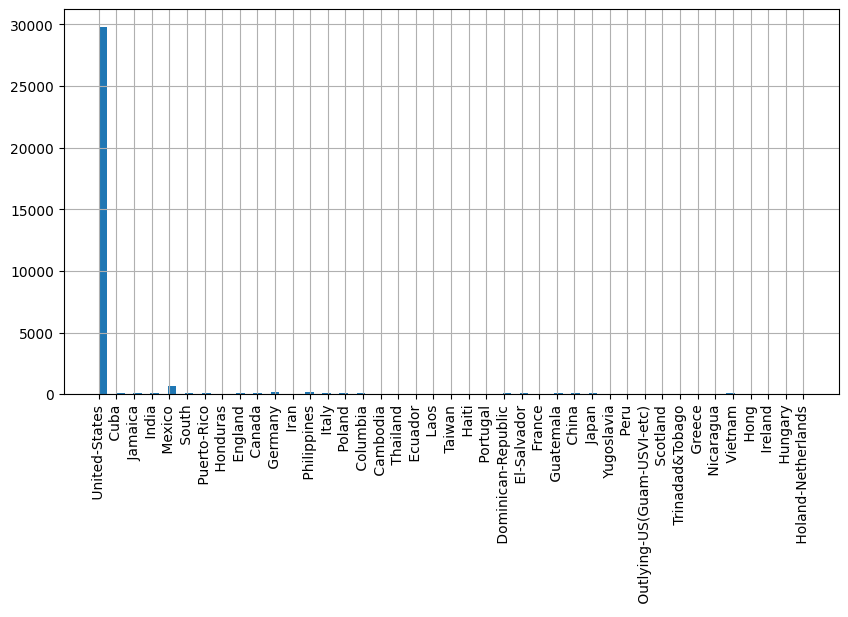

In [28]:
fillna_data['native-country'].hist(bins=fillna_data['native-country'].nunique()*2, figsize=(10, 5), xrot=90)

In [29]:
data1, data2 = [x for _, x in data.groupby(data['class'])] # Split the data into 2 subsets by classes

In [30]:
# Replace missing values by the average or mode of the attribute in the particular class to which the instance belongs
for col in nan_cols:
    # Replace missing values by the mode of the attribute in the particular class
    data1[col].fillna(data1[col].mode()[0], inplace=True)
    data2[col].fillna(data2[col].mode()[0], inplace=True)
fillna_data = pd.concat([data1, data2]) # Merge the 2 subsets

In [31]:
# Draw a histogram of the attribute after replacing missing values by the above method

<AxesSubplot: >

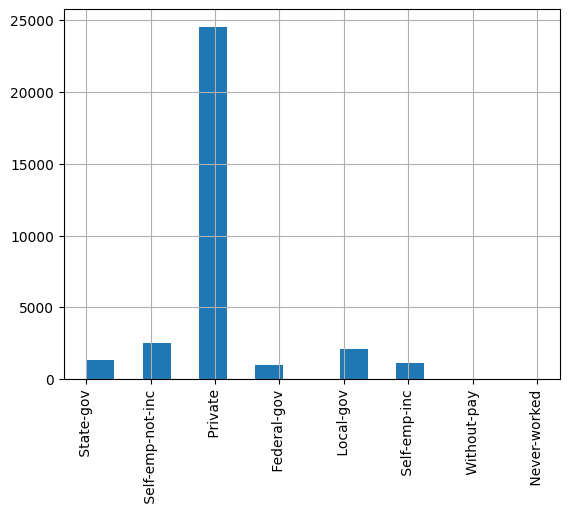

In [32]:
fillna_data['workclass'].hist(bins=fillna_data['workclass'].nunique()*2, xrot=90)

<AxesSubplot: >

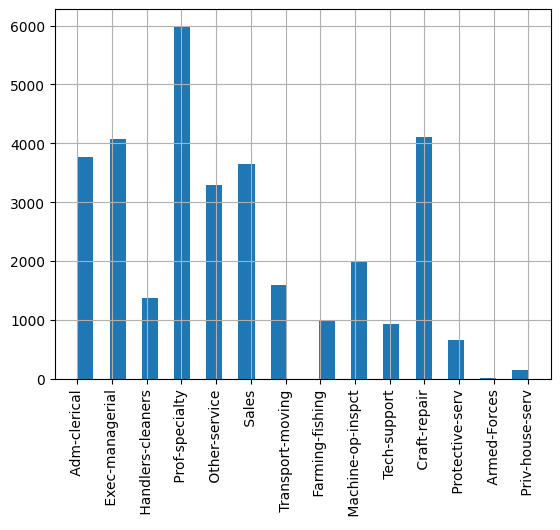

In [33]:
fillna_data['occupation'].hist(bins=fillna_data['occupation'].nunique()*2, xrot=90)

<AxesSubplot: >

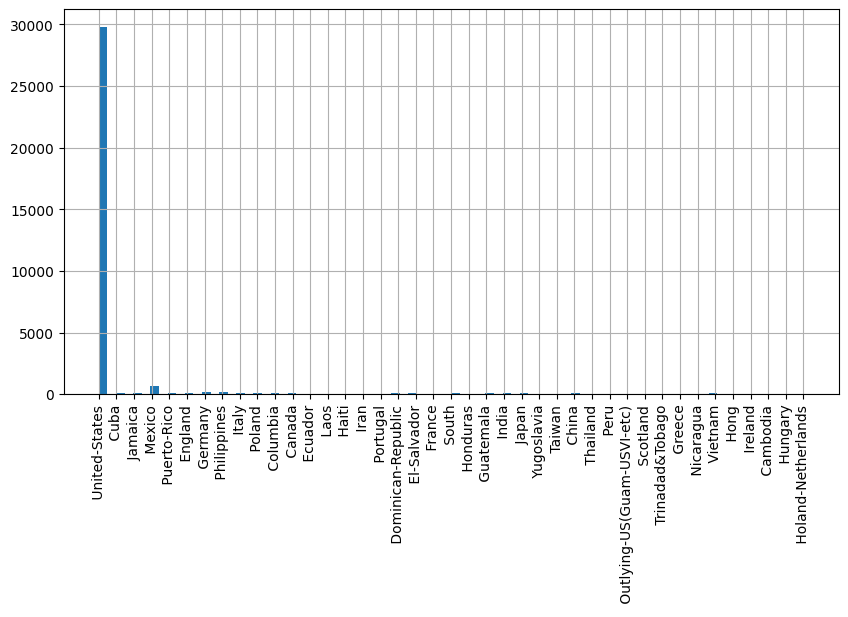

In [34]:
fillna_data['native-country'].hist(bins=fillna_data['native-country'].nunique()*2, figsize=(10, 5), xrot=90)